## Sentiment Analysis from Social Media, Reviews, Forums

In [1]:
#Import required libraries
import pandas as pd

# Load the CSV file into a DataFrame
df= pd.read_csv('sentiment-analysis.csv')
df.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [2]:
# Split the 'ColumnName' using comma delimiter
df_split = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)

# Rename columns if needed
df_split.columns = ['Text', 'Sentiment', 'Source', 'DateTime', 'UserID', 'Location', 'ConfidenceScore']

# Save the new DataFrame to a CSV
df_split.to_csv('New-Sentiment-Analysis.csv', index=False)

In [3]:
# Load the New Modified CSV file into a DataFrame

df1 = pd.read_csv('New-Sentiment-Analysis.csv')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Text             96 non-null     object 
 1   Sentiment        96 non-null     object 
 2   Source           96 non-null     object 
 3   DateTime         96 non-null     object 
 4   UserID           96 non-null     object 
 5   Location         96 non-null     object 
 6   ConfidenceScore  96 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.5+ KB
None


In [4]:
#Check for the missing values
missing_values = df1.isnull()

missing_count = df1.isnull().sum()
print(missing_count)

Text               2
Sentiment          2
Source             2
DateTime           2
UserID             2
Location           2
ConfidenceScore    2
dtype: int64


In [5]:
#Drop the null values from the DataFrame

new_df = df1.dropna()

In [6]:
# Check for duplicates in the entire DataFrame
duplicates = new_df.duplicated()

# Count duplicates in the DataFrame
duplicates_count = new_df.duplicated().sum()

# Display the duplicate rows (optional)
duplicate_rows = new_df[new_df.duplicated()]

#print("Duplicates in DataFrame:\n", duplicates)
#print("\nTotal Duplicates in DataFrame:", duplicates_count)
#print("\nDuplicate Rows:\n", duplicate_rows)

In [7]:
#Drop the duplicate values from the DataFrame

new_df = new_df.drop_duplicates()

In [8]:
# Text Preprocessing - Cleaning the data like converting to lowercase and removing special characters.

import re

# Lowercase text
new_df['Text'] = new_df['Text'].str.lower()

# Remove special characters and numbers
new_df['Text'] = new_df['Text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


In [9]:
# Convert DateTime column to a datetime object for easier manipulation.

new_df['DateTime'] = pd.to_datetime(new_df['DateTime'])

In [10]:
print(new_df.describe())

       ConfidenceScore
count        75.000000
mean          0.794667
std           0.134167
min           0.550000
25%           0.665000
50%           0.870000
75%           0.920000
max           0.950000


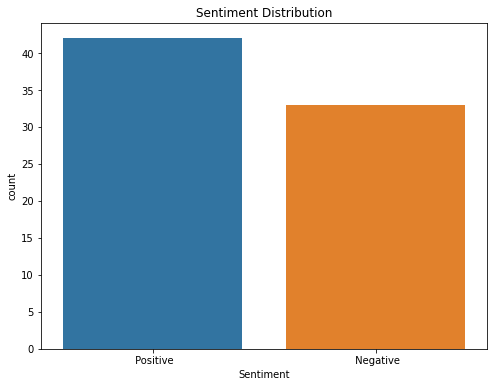

In [11]:
#Visualizating the data

import seaborn as sns
import matplotlib.pyplot as plt

#Count of positive, negative, and neutral sentiments.

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=new_df)
plt.title('Sentiment Distribution')
plt.show()

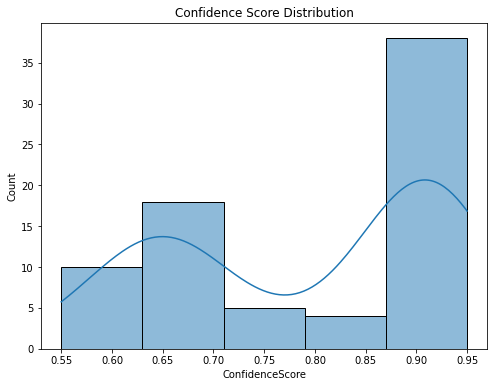

In [12]:
# Distribution of Confidence Scores

plt.figure(figsize=(8, 6))
sns.histplot(new_df['ConfidenceScore'], bins=5, kde=True)
plt.title('Confidence Score Distribution')
plt.show()

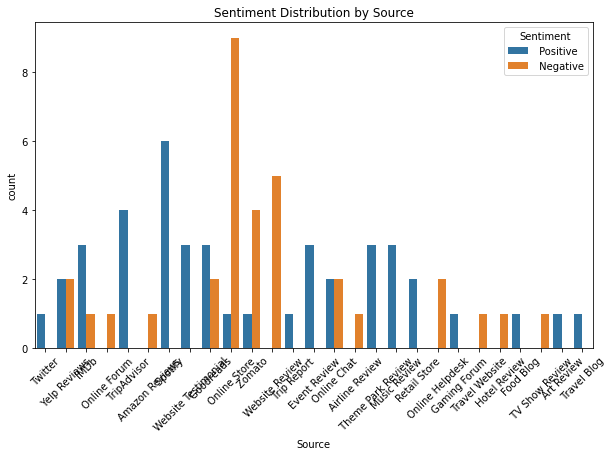

In [13]:
# Compare sentiment distributions across different sources

plt.figure(figsize=(10, 6))
sns.countplot(x='Source', hue='Sentiment', data=new_df)
plt.title('Sentiment Distribution by Source')
plt.xticks(rotation=45)
plt.show()


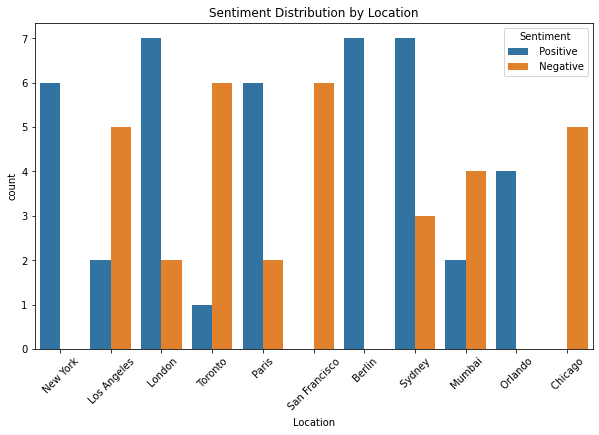

In [14]:
#Analyzing sentiment trends based on geographical locations

plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Sentiment', data=new_df)
plt.title('Sentiment Distribution by Location')
plt.xticks(rotation=45)
plt.show()
